# Numpy training

![Numpy image](http://www.numpy.org/_static/numpy_logo.png)
___

Author: Kamil Pazik

email: pazik.kamil@gmail.com

phone: +48 721 114 737

linkedIn: https://www.linkedin.com/in/kamil-pazik/

facebook: https://www.facebook.com/kamil.pazik

## TOC
1. [About numpy](#About-numpy)
2. [Numpy types](#Numpy-types)
3. [Aranging data](#Aranging-data)
4. [Operations on data](#Operations-on-data)
5. [Functions and math operations](#Functions-and-math-operations)
6. [Polynomials](#Polynomials)

## About numpy
* Python library,
* Adds support for huge arrays/matrices,
* Adds high-level mathematical functions,
* Quicker than lists,
* Memory efficent

## Przetwarzanie numeryczne

In [204]:
import numpy as np

L = range(1000)
%timeit -n 250 [i**2 for i in L]

a = np.arange(1000)
%timeit -n 250 a**2

422 µs ± 29 µs per loop (mean ± std. dev. of 7 runs, 250 loops each)
2.28 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 250 loops each)


In [205]:
from random import random

c = [random() for i in range (100000)]
%timeit -n 250 min(c)

c = np.array(c)
%timeit -n 250 np.min(c)

1.98 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 250 loops each)
45 µs ± 9.29 µs per loop (mean ± std. dev. of 7 runs, 250 loops each)


## Numpy types

In [38]:
np.array, np.matrix

(<function numpy.core.multiarray.array>, numpy.matrixlib.defmatrix.matrix)

### Creating array
* We can create an array using [__array__](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.array.html) function

In [39]:
one_d_array = np.array([1, 2, 3])
two_d_array = np.array([[1,2,3],[4,5,6]])
three_d_array = np.array([
    [
        [1, 2, 3], [4, 5, 6], [7, 8, 9]
    ]]
)

three_d_array_planes = np.array([
    [
        [1, 2, 3], [4, 5, 6], [7, 8, 9]
    ],
    [
        [1, 2, 3], [4, 5, 6], [7, 8, 9]
    ]
]
)

print(one_d_array.ndim)
print(one_d_array.shape)
print(one_d_array.dtype)

print(two_d_array.ndim)
print(two_d_array.shape)
print(two_d_array.dtype)

print(three_d_array.ndim)
print(three_d_array.shape)
print(three_d_array.dtype)

print(three_d_array_planes.ndim)
print(three_d_array_planes.shape)
print(three_d_array_planes.dtype)

1
(3,)
int64
2
(2, 3)
int64
3
(1, 3, 3)
int64
3
(2, 3, 3)
int64


In [40]:
x = [1,2,3]
a = np.asarray(x, dtype = float) 

In [41]:
type(a)

numpy.ndarray

In [42]:
np.fromiter((x ** 2 for x in range(100)), dtype=np.int, count = 6)

array([ 0,  1,  4,  9, 16, 25])

### Arrays Exercises
* You are given a space separated list of numbers (list_of_numbers = 1, 2, 3, 4, -8, -10)
* Your task is to print a reversed NumPy array with the element type float.
  * Sample output:
        [-10.  -8.   4.   3.   2.   1.]
* *__Extra__ Let use type input values

## Aranging data
In order to arange data we can use [__arange__ function](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html)

In [43]:
?np.arange

In [20]:
arr = np.arange(1e3)
type(arr), type(arr[0])

(numpy.ndarray, numpy.float64)

In [21]:
len(arr)

1000

To show array dimensions we can use:

In [22]:
arr.ndim

1

In [23]:
arr.itemsize

8

In [24]:
arr_with_step = np.arange(3, 90, 2)
# step = 2, 3, 5, 7, 9, ...

In [25]:
print(type(arr_with_step[0]))
print(arr.itemsize)
# 64 bits = 8 bytes

<class 'numpy.int64'>
8


There is a way to use [__linespace__](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linspace.html)

In [26]:
generated_data = np.linspace(1.0, 12.0, num=5, dtype=np.int16)
# 16 bits = 2 bytes

In [27]:
generated_data.itemsize

2

### Preloaded values in arrays

In [64]:
a = np.ones((3, 3))
print(a.shape)
print(a)

(3, 3)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Creating array with zeros

In [65]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

Creating array filled with value

In [66]:
np.full((2, 3), 5)

array([[5, 5, 5],
       [5, 5, 5]])

### Arrays Exercises 2
Task

You are given the shape of the array in the form of space-separated integers, each integer representing the size of different dimensions, your task is to print an array of the given shape and integer type using the tools numpy.zeros and numpy.ones.

Input Format

A single line containing the space-separated integers.

Output Format

First, print the array using the numpy.zeros tool and then print the array with the numpy.ones tool.

ex. input
3 3 3 

### [identity](https://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html#numpy.identity) table 

square matrix with all the main diagonal elements as 1 and the rest as 0

In [96]:
print(np.identity(3)) #3 is for  dimension 3 X 3

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### [eye](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html#numpy-eye) table

In [98]:
np.eye(8, 7, k = 1)    # 8 X 7 Dimensional array with first upper diagonal 1.

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

### Arrays Exercises 3

Task

Your task is to print an array of size **N x M** with its main diagonal elements as **1's** and **0's** everywhere else.

Input Format

A single line containing the space separated values of **N and  M**. 

**N** denotes the rows. 

**M** denotes the columns.

Output Format

Print the desired **N x M** array.

### Creating random values array

In [128]:
grades = np.random.randint(2, 5, 15)
print(grades)

[3 3 3 4 2 4 3 2 4 2 4 3 2 4 3]


Sorting values

In [129]:
grades.sort() # inplace
print(grades)

[2 2 2 2 3 3 3 3 3 3 4 4 4 4 4]


Shuffling values

In [131]:
np.random.shuffle(grades)
print(grades)

[3 4 3 4 2 3 3 3 2 2 4 4 2 3 4]


### Create random samples from a normal (Gaussian) distribution

generating normal distribution values, setting up seed value

In [79]:
np.random.seed(100)
girls = np.random.normal(160, 5, 100)

printing varimance,

In [133]:
girls.var(), girls.min(), girls.max(), girls.mean(), girls.std(), np.sqrt(girls.var())

(23.51049760335395,
 147.56424232388616,
 170.17303780752468,
 159.47917073077969,
 4.848762481639408,
 4.848762481639408)

In [81]:
girls = np.random.normal(160, 5, 100)
girls.var(), girls.max(), girls.std()

(28.305649293246024, 171.4932697035684, 5.320305375939056)

### Getting into data
* In order to retreive data or manipulate data we can use slicing.

In [134]:
grades

array([3, 4, 3, 4, 2, 3, 3, 3, 2, 2, 4, 4, 2, 3, 4])

In [140]:
indices = [1, 2, 6]

In [142]:
grades[indices]

array([4, 3, 3])

In [143]:
grades[1:3]

array([4, 3])

In [235]:
girls[(girls > 165) & (girls < 170)]

array([165.76517901, 165.14866343, 168.0949083 , 167.70802587,
       166.80778063, 165.94811134, 166.49874037, 167.35356933,
       166.24734871, 165.1346072 , 169.38286713, 169.15968041])

In [234]:
girls.ndim

1

In [239]:
np.all([[True,False],[True,True]], axis=1)

array([False,  True])

In [238]:
np.all([[True,False],[True,True]], axis=0)

array([ True, False])

* or we can select values based onresult of Boolean operations

In [69]:
grades < 3

array([ True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False])

In [201]:
grades[(grades >= 3) & (grades < 5)]

array([3, 4, 3, 4, 3, 3, 3, 4, 4, 3, 4])

In [68]:
a = np.array([np.nan, 1,2,np.nan,3,4,5]) 
print(a[~np.isnan(a)])

[1. 2. 3. 4. 5.]


In [70]:
np.isnan(a)

array([ True, False, False,  True, False, False, False])

In [71]:
~np.isnan(a)

array([False,  True,  True, False,  True,  True,  True])

In [86]:
3 | grades

array([3, 3, 3, 7, 3, 7, 3, 3, 7, 3, 7, 3, 3, 7, 3])

### Reshaping data

In [4]:
array_to_reshape = np.arange(3, 15, 2)

In [5]:
array_to_reshape.flatten() # shapes to flat array

array([ 3,  5,  7,  9, 11, 13])

In [6]:
array_to_reshape.tolist() # shapes to list

[3, 5, 7, 9, 11, 13]

In [6]:
array_to_reshape.reshape(6,)

array([ 3,  5,  7,  9, 11, 13])

In [7]:
array_to_reshape.reshape(13,)

ValueError: cannot reshape array of size 6 into shape (13,)

In [9]:
%debug

> <ipython-input-8-6cb5299ba3e7>(1)<module>()
----> 1 array_to_reshape.reshape(13,)

ipdb> l
----> 1 array_to_reshape.reshape(13,)

ipdb> array_to_reshape.reshape(6,)
array([ 3,  5,  7,  9, 11, 13])
ipdb> c


In [ ]:
array_to_reshape.reshape(6,)

In [10]:
array_to_reshape2 = np.arange(1, 13)

In [13]:
array_to_reshape2.shape = (4, 3)
array_to_reshape2

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [14]:
array_to_reshape2.shape = (3, 4)
array_to_reshape2

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [15]:
array_to_reshape2.shape = (2, 6)
array_to_reshape2

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [111]:
13 in array_to_reshape2

False

## Operations on data

[Transposition](https://en.wikipedia.org/wiki/Transpose)

In [37]:
my_array = np.array([
                     [1, 2, 3],
                     [4, 1, 6], 
                     [8, 1, 3]
                    ]
                   )

In [42]:
my_array.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [40]:
my_array.transpose()

array([[1, 4, 8],
       [2, 1, 1],
       [3, 6, 3]])

In [43]:
my_array.T == my_array.transpose()

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [56]:
check_of_transpose = my_array.T == np.array([ [1, 4, 8], [2, 1, 1], [3, 6, 4]])
check_of_transpose.all()

False

Flatten - reduces table dimensions to one

In [57]:
my_array = np.array([[1,2,3],
                        [4,5,6]])
print(my_array.flatten())

[1 2 3 4 5 6]


### Exercise

Task

You are given a __N x M__ integer array matrix with space separated elements ( **N** = rows and  **M** = columns). 
Your task is to print the transpose and flatten results.

Input Format

The first line contains the space separated values of **N** and **M** . 
The next **N** lines contains the space separated elements of **M** columns.

Output Format

First, print the transpose array and then print the flatten.

ex. input:
2 2
1 2
3 4


ex. output

[[1 3]

 [2 4]]
 
[1 2 3 4]

Concatenation

In [83]:
array_1 = np.array([1,2,3])
array_2 = np.array([4,5,6])
array_3 = np.array([7,8,9])

print(np.concatenate((array_1, array_2, array_3)))  

[1 2 3 4 5 6 7 8 9]


In [84]:
array_1 = np.array([[1,2,3],[0,0,0]])
array_2 = np.array([[0,0,0],[7,8,9]])

print(np.concatenate((array_1, array_2), axis = 1)) 
print(np.concatenate((array_1, array_2), axis = 0)) 

[[1 2 3 0 0 0]
 [0 0 0 7 8 9]]
[[1 2 3]
 [0 0 0]
 [0 0 0]
 [7 8 9]]


### Exercise
Task

You are given two integer arrays of size __N x P__  and __M x P__ ( __N & M__ are rows, and P is the column).
Your task is to concatenate the arrays along axis __0__.

Input Format

The first line contains space separated integers __N, M and P__. 
The next **N** lines contains the space separated elements of the __P__ columns. 
After that, the next  lines contains the space separated elements of the  columns.

Output Format

Print the concatenated array of size **(N+M)*P**.

In [115]:
a = np.array([1,2,3,4], float)
b = np.array([5,6,7,8], float)

print('Sum a and b')
print(a + b)                     #[  6.   8.  10.  12.]
print(np.add(a, b))           #[  6.   8.  10.  12.]

print('Substract a and b')
print(a - b)                     #[-4. -4. -4. -4.]
print(np.subtract(a, b))      #[-4. -4. -4. -4.]

print('Multiplication a and b')
print(a * b)                     #[  5.  12.  21.  32.]
print(np.multiply(a, b))      #[  5.  12.  21.  32.]

print('Division a and b')
print(a / b)                     #[ 0.2         0.33333333  0.42857143  0.5       ]
print(np.divide(a, b))        #[ 0.2         0.33333333  0.42857143  0.5       ]

print('Mod a and b')
print(a % b)                     #[ 1.  2.  3.  4.]
print(np.mod(a, b))           #[ 1.  2.  3.  4.]

print('Power a and b')
print(a**b)                      #[  1.00000000e+00   6.40000000e+01   2.18700000e+03   6.55360000e+04]
print(np.power(a, b))         #[  1.00000000e+00   6.40000000e+01   2.18700000e+03   6.55360000e+04]

Sum a and b
[ 6.  8. 10. 12.]
[ 6.  8. 10. 12.]
Substract a and b
[-4. -4. -4. -4.]
[-4. -4. -4. -4.]
Multiplication a and b
[ 5. 12. 21. 32.]
[ 5. 12. 21. 32.]
Division a and b
[0.2        0.33333333 0.42857143 0.5       ]
[0.2        0.33333333 0.42857143 0.5       ]
Mod a and b
[1. 2. 3. 4.]
[1. 2. 3. 4.]
Power a and b
[1.0000e+00 6.4000e+01 2.1870e+03 6.5536e+04]
[1.0000e+00 6.4000e+01 2.1870e+03 6.5536e+04]


### Exercise
Task

You are given two integer arrays, A and B of dimensions **N x M**. 
Your task is to perform the following operations:

Add ( + )
Subtract ( - )
Multiply ( * )
Integer Division ( / )
Mod ( % )
Power ( ** )

Input Format

The first line contains two space separated integers, **N and M** . 

The next **N** lines contains  space separated **M** integers of array **A**. 

The following **N** lines contains **M** space separated integers of array **B**.

Output Format

Print the result of each operation in the given order under Task.

#### [Matrix](https://en.wikipedia.org/wiki/Matrix_multiplication) multiplication

In [118]:
a = np.array([[ 1,  0,  2],
       [-1,  3,  1]])

b = np.array([[3, 1],
       [2, 1],
       [1, 0]])


print(a.dot(b))

a = np.array([[ 1,  0,  2], [ 2, 3, 4]])
b = np.array([[ 2,  3,  3], [ 1, 4, 5]])
print(a * b)

[[5 1]
 [4 2]]
[[ 2  0  6]
 [ 2 12 20]]


In [113]:
a = np.matrix([[ 1,  0,  2],
       [-1,  3,  1]])

b = np.matrix([[3, 1],
       [2, 1],
       [1, 0]])
a * b

matrix([[5, 1],
        [4, 2]])

In [112]:
a_array = np.array([1, 2])
b_array = np.array([1, 2])

a_array * b_array

array([1, 4])

In [109]:
a_matrix = np.matrix([1, 2 ])
b_matrix = np.matrix([[1] , [2]])

In [110]:
a_matrix * b_matrix

matrix([[5]])

## Functions and math operations

In [27]:
a = np.arange(1, 100, 3)

In [28]:
a.var()

816.0

In [29]:
a.mean()

49.0

In [32]:
a.min(), a.max(), a.cumsum()

(1,
 97,
 array([   1,    5,   12,   22,   35,   51,   70,   92,  117,  145,  176,
         210,  247,  287,  330,  376,  425,  477,  532,  590,  651,  715,
         782,  852,  925, 1001, 1080, 1162, 1247, 1335, 1426, 1520, 1617]))

### Floor

In [242]:
my_array = np.array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])
print(np.floor(my_array))         #[ 1.  2.  3.  4.  5.  6.  7.  8.  9.]

[1. 2. 3. 4. 5. 6. 7. 8. 9.]


### Ceil

In [243]:
import numpy

my_array = np.array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])
print(np.ceil(my_array))          #[  2.   3.   4.   5.   6.   7.   8.   9.  10.]

[ 2.  3.  4.  5.  6.  7.  8.  9. 10.]


### Exercise

Task 
You are given a 1-D array, . Your task is to print the floor,  and ceil  of all the elements of array A.

Input Format

A single line of input containing the space separated elements of array .

Output Format

On the first line, print the floor of A. 
On the second line, print the ceil of A. 


### Sum

In [244]:
my_array = np.array([ [1, 2], [3, 4] ])

print(np.sum(my_array, axis = 0))         #Output : [4 6]
print(np.sum(my_array, axis = 1))         #Output : [3 7]
print(np.sum(my_array, axis = None))      #Output : 10
print(np.sum(my_array))                   #Output : 10

[4 6]
[3 7]
10
10


### Prod

In [245]:
my_array = numpy.array([ [1, 2], [3, 4] ])

print(np.prod(my_array, axis = 0))            #Output : [3 8]
print(np.prod(my_array, axis = 1))            #Output : [ 2 12]
print(np.prod(my_array, axis = None))         #Output : 24
print(np.prod(my_array))                      #Output : 24

[3 8]
[ 2 12]
24
24


### Exercise
Task

You are given a 2-D array with dimensions N x M. 
Your task is to perform the sum tool over axis 0 and then find the product of that result.

Input Format

The first line of input contains space separated values of N and M. 
The next N lines contains M space separated integers.

Output Format

Compute the sum along axis 0 . Then, print the product of that sum.

In [87]:
# np.abs(a)	Absolute value.
# np.arccos(a)	Inverse cosine.
# np.arcsin(a)	Inverse sine.
# np.arctan(a)	Inverse tangent.
# np.arctan2(y, x)	Computes the arctangent of the slope whose Δy is y and whose Δx is x.
# np.cos(a)	Cosine.
# np.exp(a)	Exponential, ea.
# np.log(a)	Natural log.
# np.log10(a)	Common log (base 10).
# np.sin(a)	Sine.
# np.sqrt(a)	Square root.
# np.tan(a)	Tangent.

## Polynomials

The equation used depends on whether the the value of  
$Ax^3+Bx^2+Cx+D$

In [207]:
coeff = [3, -2, 0]

In [208]:
np.roots(coeff)

array([0.66666667, 0.        ])

In [213]:
coeff = [12, -2, 1, 19]

In [215]:
np.polyder(coeff) # 12x^3 - 2x^2 + x + 19

array([36, -4,  1])

In [217]:
np.roots([3, -12, 4])

array([3.63299316, 0.36700684])

Text(0.5,1,'Polynomial with Matplotlib')

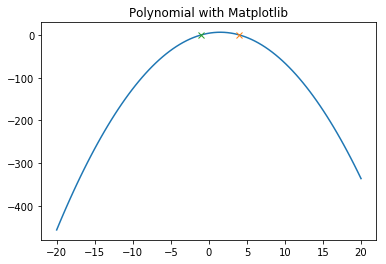

In [232]:
import matplotlib.pyplot as plt

coeff = [-1, 3, 4] # -x^2 + 3x + 4
x = np.linspace(-20, 20, 90)

plt.plot(x, np.polyval(coeff ,x))
plt.plot([np.roots(coeff)], [0], 'x')
plt.title('Polynomial with Matplotlib')